<a href="https://colab.research.google.com/github/viansebastian/Universiteit/blob/main/Vehicle_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre-Processing

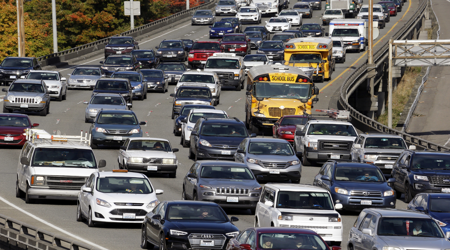

In [ ]:
import cv2
import numpy as np
import requests
from PIL import Image
from google.colab.patches import cv2_imshow


image = Image.open(requests.get('https://s.wsj.net/public/resources/images/BN-WB347_3gljM_OR_20171109123717.jpg', stream=True).raw)
image = image.resize((450,250))
image_arr = np.array(image)
image

# Image Processing

## Convert image to Grayscale

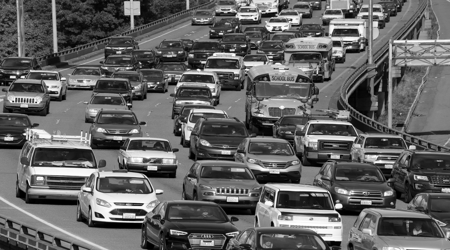

In [ ]:
image_gray = cv2.cvtColor(image_arr, cv2.COLOR_BGR2GRAY)
Image.fromarray(image_gray)

## Implement Gaussian Blur

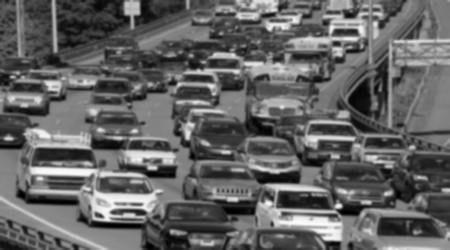

In [ ]:
blurred = cv2.GaussianBlur(image_gray, (5, 5), 0)
Image.fromarray(blurred)

## Implement Dilation

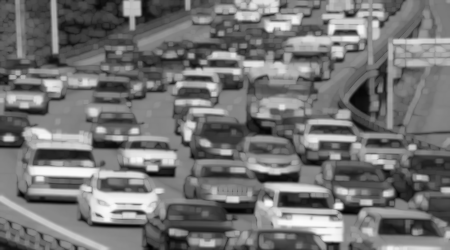

In [ ]:
dilated = cv2.dilate(blurred,np.ones((3, 3)))
Image.fromarray(dilated)

## Implement Morphological Closing

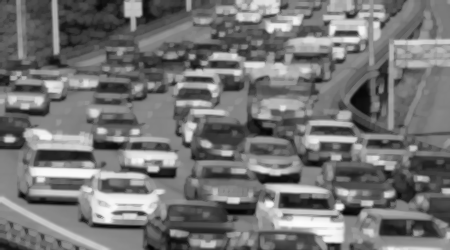

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
closing = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel)
Image.fromarray(closing)

# Feature Extraction

In [ ]:
import requests
from io import BytesIO
import os

url = "https://raw.githubusercontent.com/andrewssobral/vehicle_detection_haarcascades/master/cars.xml"
response = requests.get(url)

if response.status_code == 200:

    content = response.content

    with open('cars.xml', 'wb') as file:
        file.write(content)

    if os.path.exists('cars.xml'):
        print("Haar Cascade file downloaded successfully.")
        car_cascade_src = 'cars.xml'
    else:
        print("Error: 'cars.xml' not found.")
else:
    print(f"Error downloading Haar Cascade file. Status code: {response.status_code}")


Haar Cascade file downloaded successfully.


In [ ]:
car_cascade_src = 'cars.xml'
car_cascade = cv2.CascadeClassifier(car_cascade_src)
cars = car_cascade.detectMultiScale(closing, 1.1, 1)
cars

array([[323,   6,  43,  43],
       [233,  39,  22,  22],
       [268,  42,  22,  22],
       [242,  41,  29,  29],
       [203,  40,  39,  39],
       [177,  54,  43,  43],
       [176,  34,  50,  50],
       [  7,  56,  50,  50],
       [ 83,  54,  54,  54],
       [317, 103,  23,  23],
       [234,  72,  84,  84],
       [303, 114,  27,  27],
       [362, 118,  44,  44],
       [314, 103,  46,  46],
       [ 83, 116,  47,  47],
       [122, 112,  54,  54],
       [ 17, 103,  85,  85],
       [272, 151,  23,  23],
       [298, 144,  30,  30],
       [138, 143,  49,  49],
       [201, 147,  49,  49],
       [111, 160,  48,  48],
       [267, 171,  39,  39],
       [ 22, 174,  45,  45],
       [ 42, 174,  45,  45],
       [286, 172,  54,  54],
       [330, 180,  48,  48],
       [368, 198,  49,  49],
       [ 77, 154,  57,  57],
       [416, 214,  34,  34]], dtype=int32)

30  cars found


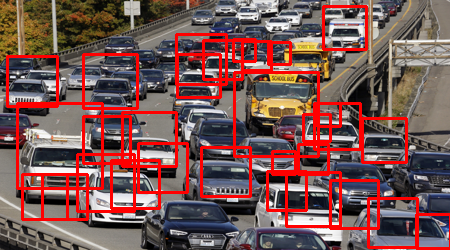

In [ ]:
cnt = 0
for (x,y,w,h) in cars:
    cv2.rectangle(image_arr,(x,y),(x+w,y+h),(255,0,0),2)
    cnt += 1
print(cnt, " cars found")
Image.fromarray(image_arr)

In [ ]:
def dilation(image, kernel):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    result = np.zeros((image_height, image_width), dtype=np.uint8)

    # Define the center of the kernel
    anchor_x, anchor_y = kernel_height // 2, kernel_width // 2

    for i in range(image_height):
        for j in range(image_width):
            if image[i, j] > 0:
                # Iterate over the kernel and check for overlap with the image
                for k in range(kernel_height):
                    for l in range(kernel_width):
                        # Calculate coordinates in the image for the current kernel element
                        x = i + k - anchor_x
                        y = j + l - anchor_y
                        if 0 <= x < image_height and 0 <= y < image_width and kernel[k, l] > 0:
                            result[x, y] = 1

    return result

In [ ]:
def closing(image, kernel):
  dilated = dilation(image, kernel)
  result = erosion(dilated, kernel)
  return result